# Computer Vision - Image Classification

## Set up

In [102]:
#Import dataframe
import pandas as pd
df = pd.read_csv(r"C:\Users\jg\code\templat_reg_and_class\data\computer_vision\labels.csv")

#Change col in df from breed to label
df = df.rename(columns={"breed":"label"})

#Get labels and sort df according to id
import numpy as np
labels = np.unique(df["label"].tolist())
df = df[df["label"].isin(labels)].sort_values("id").reset_index(drop=True)

#Add target value y
df["y"] = df["label"].factorize(sort=True)[0]

#Create a dictonary with labels and belonging class
dic_y_mapping = dict(df[["y", "label"]].drop_duplicates().sort_values("y").values)

print("Dictonary : \n", dic_y_mapping)
print(" ")
print("Dataframe : \n", df.head())

Dictonary : 
 {0: 'affenpinscher', 1: 'afghan_hound', 2: 'african_hunting_dog', 3: 'airedale', 4: 'american_staffordshire_terrier', 5: 'appenzeller', 6: 'australian_terrier', 7: 'basenji', 8: 'basset', 9: 'beagle', 10: 'bedlington_terrier', 11: 'bernese_mountain_dog', 12: 'black-and-tan_coonhound', 13: 'blenheim_spaniel', 14: 'bloodhound', 15: 'bluetick', 16: 'border_collie', 17: 'border_terrier', 18: 'borzoi', 19: 'boston_bull', 20: 'bouvier_des_flandres', 21: 'boxer', 22: 'brabancon_griffon', 23: 'briard', 24: 'brittany_spaniel', 25: 'bull_mastiff', 26: 'cairn', 27: 'cardigan', 28: 'chesapeake_bay_retriever', 29: 'chihuahua', 30: 'chow', 31: 'clumber', 32: 'cocker_spaniel', 33: 'collie', 34: 'curly-coated_retriever', 35: 'dandie_dinmont', 36: 'dhole', 37: 'dingo', 38: 'doberman', 39: 'english_foxhound', 40: 'english_setter', 41: 'english_springer', 42: 'entlebucher', 43: 'eskimo_dog', 44: 'flat-coated_retriever', 45: 'french_bulldog', 46: 'german_shepherd', 47: 'german_short-haired_p

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
The dimension of the input image is :  (283, 500, 3)
The height of the input image is :  283
The width of the input image is :  500
The Number of Channels in the input image are :  3


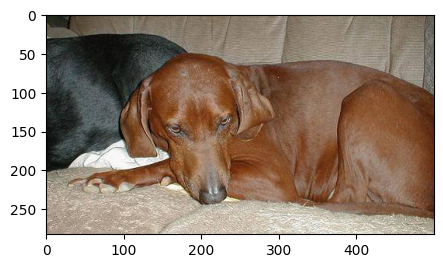

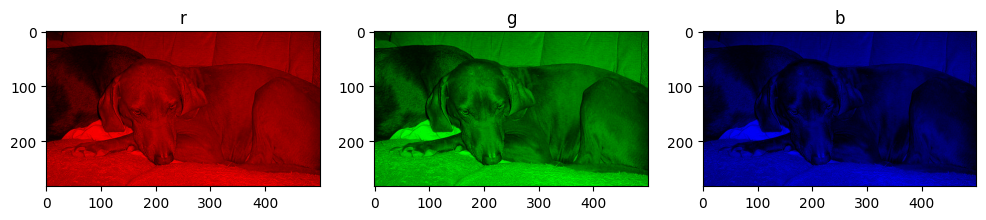

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [103]:
#Load a image
from functions_computer_vision import load_img
img = load_img(file = r"C:\Users\jg\code\templat_reg_and_class\data\computer_vision\train\0a13f9596e03a9f87c96aaff6e057048.jpg")

#Plot an image
%load_ext autoreload
from functions_computer_vision import plot_imgs
%autoreload 2
plot_imgs(img, dim="yes")

#Plot image in RGB
from functions_computer_vision import rgb_imgs
rgb_imgs(img)

#Load all images from train
%load_ext autoreload
from functions_computer_vision import load_imgs
%autoreload 2
lst_imgs,errors = load_imgs(r"C:\\Users\\jg\code\\templat_reg_and_class\\data\\computer_vision\\train\\")

In [104]:
#Add images from train to dataframe
df["img"] = lst_imgs

#Reduce number of classes to avoid computational cost
labels = ["scottish_deerhound", "maltese_dog", "afghan_hound", "entlebucher", "bernese_mountain_dog"]

df = df[df["label"].isin(labels)].sort_values("id").reset_index(drop=True)

#Add target value y
df["y_new"] = df["label"].factorize(sort=True)[0]

#Drop original y
df = df.drop(columns=["y"])

#Rearreange col
df = df[["id","img","label","y_new"]]

print("check: | Nas:", errors, "=", df["img"].isna().sum())
print("Head of df :", df.head())

check: | Nas: 0 = 0


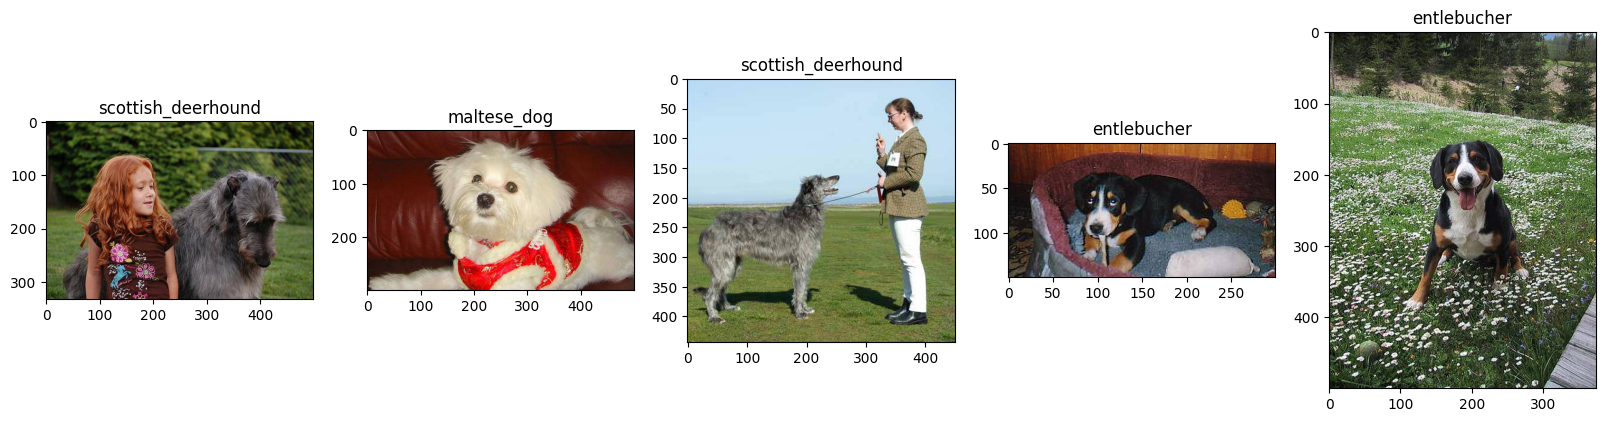

In [106]:
#Plot first five image i df
plot_imgs(df["img"].head(), df["label"].head())

## Analysis

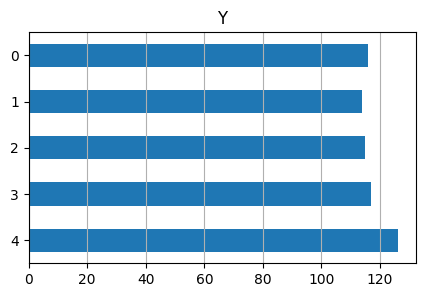

Nr of classes in target :  5
Mean of width : 408.0459183673469
Mean of height : 448.9438775510204


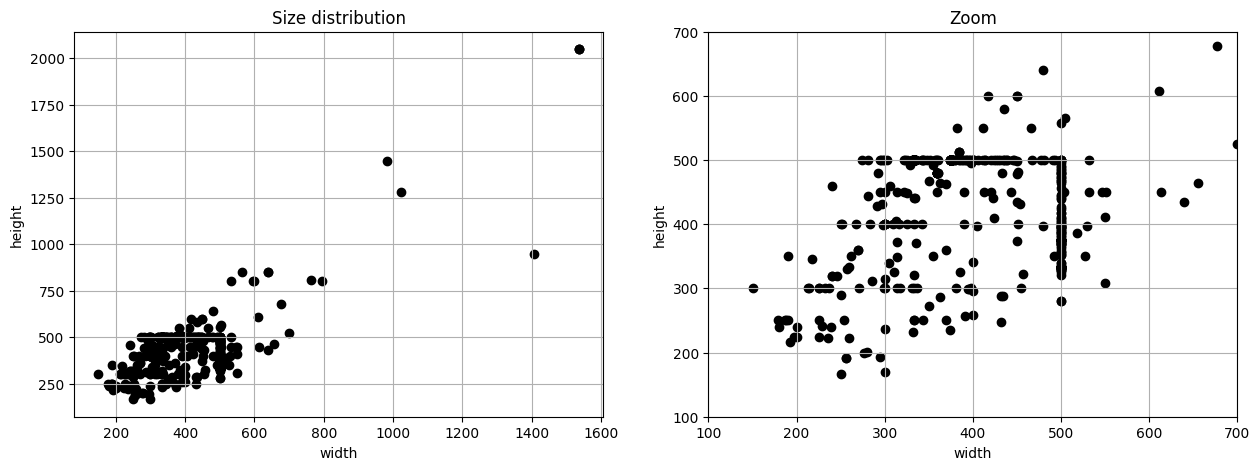

In [111]:
from functions_computer_vision import analysis_imgs
analysis_imgs(df,target_name="y_new")